# Thera Bank - Campaign for selling personal loans

Thera Bank which has a growing customer base. <br>Majority of these customers are <b>liability customers (depositors)</b> with varying size of deposits. <br>The number of customers who are also <b>borrowers (asset customers)</b> is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. <br>In particular, the management wants to explore ways of <b>converting</b> its liability customers to <b>personal loan customers (while retaining them as depositors)</b>. <br>A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over <b>9% success</b>. <br>This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

# Importing necessary packages

In [1]:
# basic packages
import pandas as pd
import numpy as np

# for plot
import matplotlib.pyplot as plt
import seaborn as sns

# for classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# for Naive Bayes
from sklearn.naive_bayes import GaussianNB

# for scaling
from sklearn.preprocessing import StandardScaler

# for ignore warning
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Exploratory Data Analysis

In [3]:
# doing descriptive analysis
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<b><u>Data distribution:</u></b><br>
<b>Experience</b> field has data range from -3 to 43, where -3 can be considered 0, since there are no negative experience<br>
<b>Income</b> field has data range from 8 to 224, where 3rd quartile is 98, hence we have some outliers<br>
<b>Family</b> field has data range from 1 to 4, means family member size<br>
<b>CCAvg</b> field has data from 0 to 10, where 3rd quartile is 2.5, hence we have some outliers<br>
<b>Education</b> field has data from 1 to 3<br>
<b>Mortgage</b> field value from 0 to 635, hence 1st and 2nd quartile is 0 and 3rd quartile is 101<br>
<b>Personal Loan, Securities Account, CD Account, Online and CreditCard</b> has 0 and 1 binary value

We can't consider <b>ID</b> and <b>ZIP Code</b> as features, since its just providing some numeric values and not adding any significant value to model, hence we can remove both the fields

In [4]:
#dropping ID and ZIP Code
df = df.drop(['ID','ZIP Code'], axis=1)

In [5]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [6]:
# get the column data types
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
# check is there any missing values in data
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No missing values

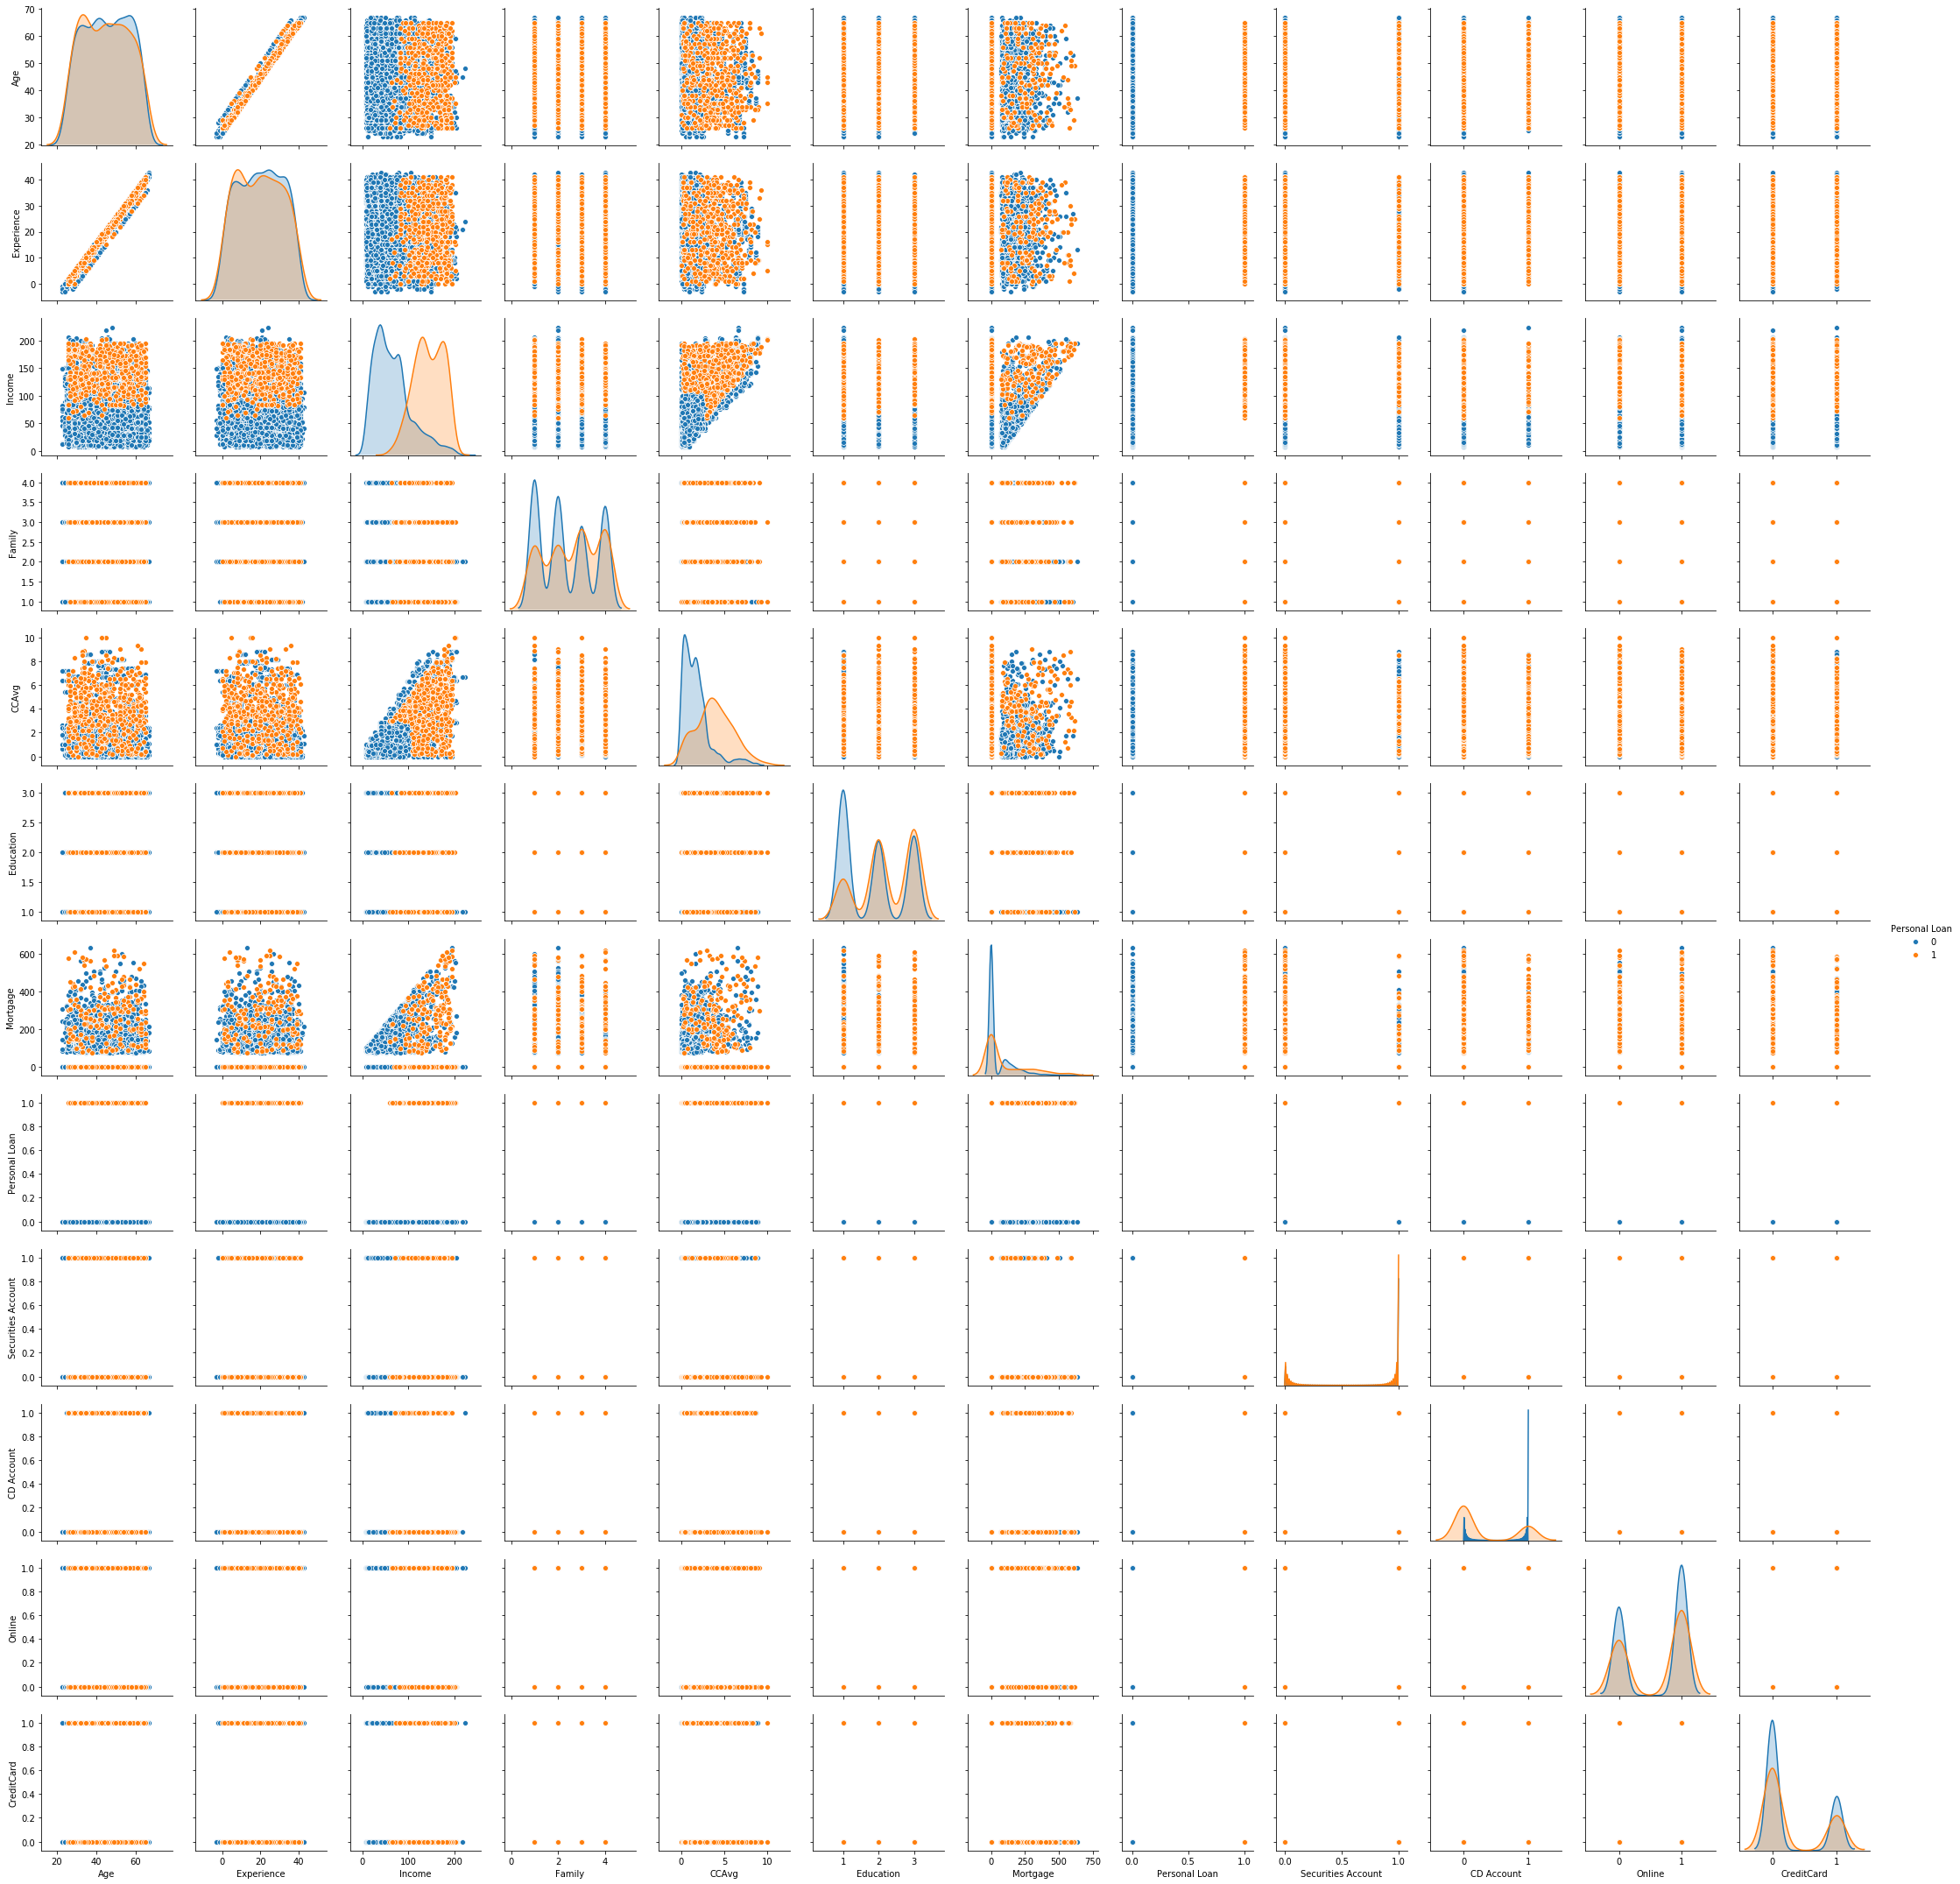

In [8]:
# Let us analyze the different attributes for distribution and the correlation by using scatter matrix
sns.pairplot(df, hue='Personal Loan')

Pairplot doesn't give much since most of the columns are categorical fields, but we can see categorical fields value distribution in diagonal in plot, it shows the value distributed for each value

### Checking correlation between fields using heatmap

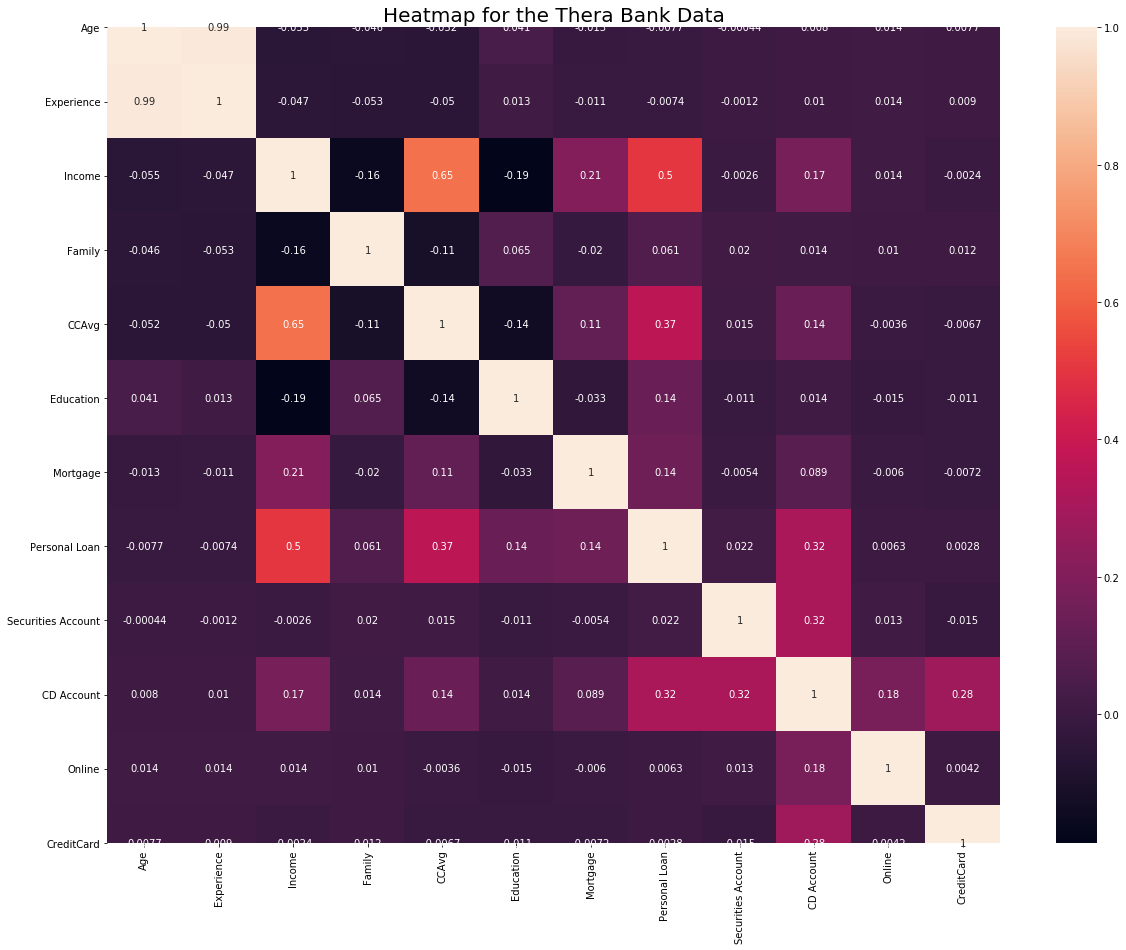

In [9]:
#heat map to find the correlation between each fields
plt.rcParams['figure.figsize'] = (20, 15)

sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap for the Thera Bank Data', fontsize = 20)
plt.show()

<b>Age</b> and <b>Experience</b> are highly correlated to each other, so removing one of them will improve the model

### Finding distribution amoung categorical fields and get target field

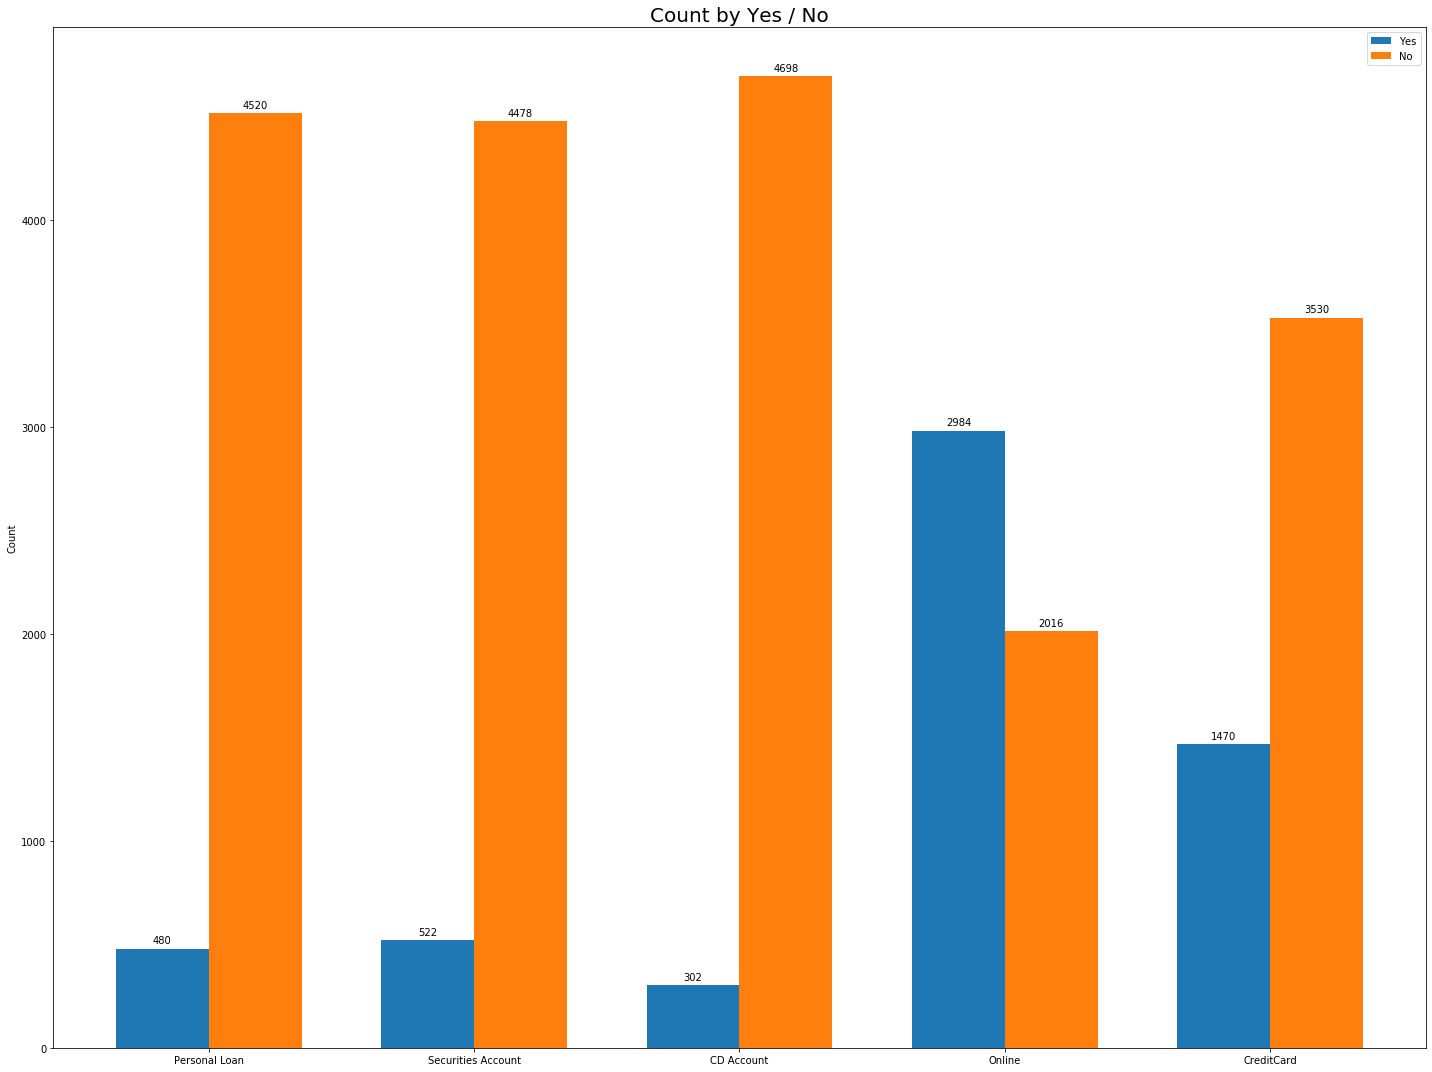

In [10]:
# function for getting Yes Count and No Count from list of columns
def column_count(columns):
    for column in columns:
        yes_count.append(df[column][df[column]==1].count())
        no_count.append(df[column][df[column]==0].count())
        
    return yes_count, no_count

# setting lable for each bar
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
# creating bar chart for 'Personal Loan','Securities Account','CD Account','Online',
# 'CreditCard' columns to understand the data
columns = ['Personal Loan','Securities Account','CD Account','Online','CreditCard']
yes_count = []
no_count = []

yes_count, no_count = column_count(columns)

x = np.arange(len(columns))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, yes_count, width, label='Yes')
rects2 = ax.bar(x + width/2, no_count, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Count by Yes / No', fontsize = 20, fontweight = 30)
ax.set_xticks(x)
ax.set_xticklabels(columns)
ax.legend()

plt.rcParams['figure.figsize'] = (7, 9)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

The above bar chart shows distribution of Personal Loan, Securities Account, CD Account, Online, and CreditCard.<br>
<b>Personal Loan</b> will be target of classification, since this model to predict the probability of getting Personal Loan <br>
So it's unbalance dataset.

### Relation between Family and Personal Loan

In [11]:
# using crosstab, finding the count of Personal Loan taken by family type
family = pd.crosstab(df['Family'], df['Personal Loan'])
family

Personal Loan,0,1
Family,,
1,1365,107
2,1190,106
3,877,133
4,1088,134


Looks like the more members, it likely to take Personal Loan<br><br>
#### Lets visualise the data

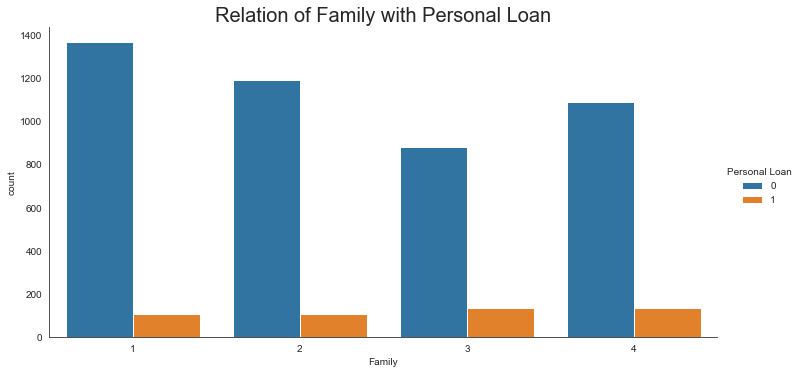

In [12]:
with sns.axes_style('white'):
    g = sns.factorplot('Family', data=df, aspect=2.0, kind='count', hue='Personal Loan')
    plt.title('Relation of Family with Personal Loan', fontsize = 20)
    plt.show()

The above chart shows relation of Family with Personal Loan.<br>
It seems that the more families there are, the more likely they are to make a loan.

### Relation between Education and Personal Loan

In [13]:
# using crosstab, finding the count of Personal Loan taken by education
edu = pd.crosstab(df['Education'], df['Personal Loan'])
edu

Personal Loan,0,1
Education,,
1,2003,93
2,1221,182
3,1296,205


Looks like the more education, it likely to take Personal Loan<br><br>
#### Lets visualise the data

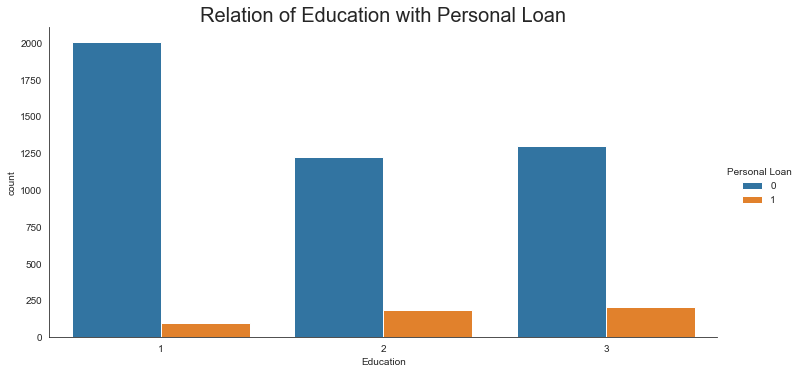

In [14]:
with sns.axes_style('white'):
    g = sns.factorplot('Education', data=df, aspect=2.0, kind='count', hue='Personal Loan')
    plt.title('Relation of Education with Personal Loan', fontsize = 20)
    plt.show()

The above chart shows relation of Education with Personal Loan.<br>
It seems that people who have a high education tend to have a loan.

### Relation of Income with Personal Loan

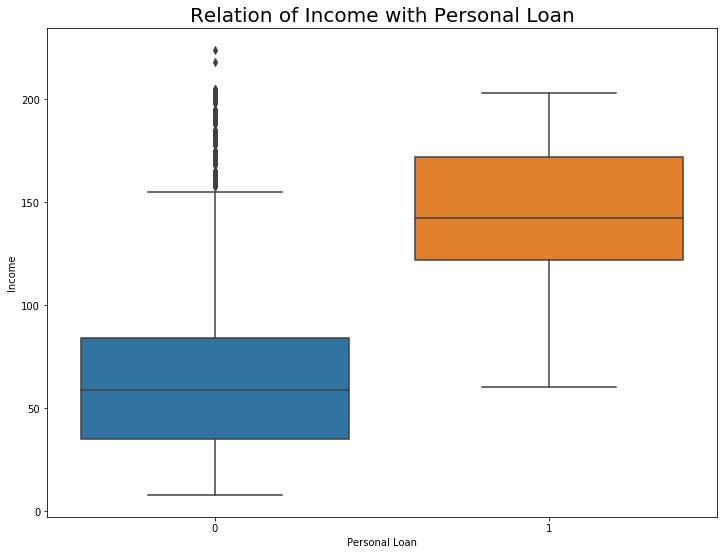

In [15]:
# finding the relationship between Income and Personal Loan using Boxplot
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df['Personal Loan'], df['Income'])
plt.title('Relation of Income with Personal Loan', fontsize = 20)
plt.show()

There is a clear difference in the relationship between Income and Personal Loan.

### Relation of CCAvg with Personal Loan

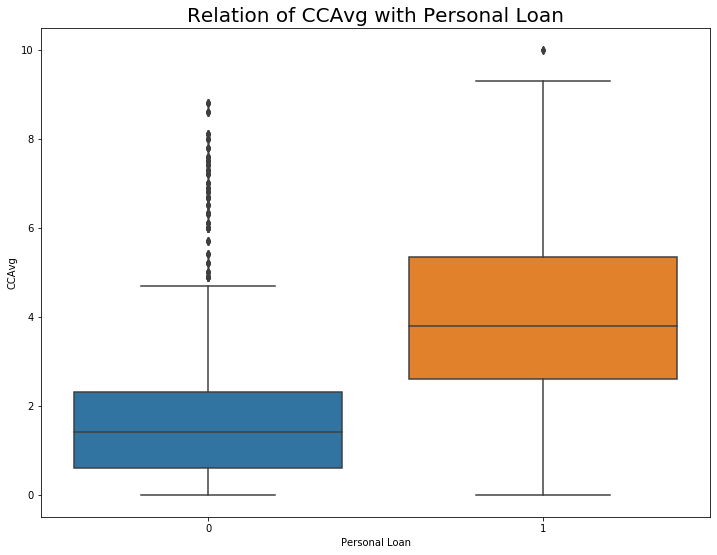

In [16]:
# finding the relationship between CCAvg and Personal Loan using Boxplot
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df['Personal Loan'], df['CCAvg'])
plt.title('Relation of CCAvg with Personal Loan', fontsize = 20, fontweight = 30)
plt.show()

 CCAvg is likely to be related to the availability of Personal Loan.

### Relation between Mortgage and Personal Loan

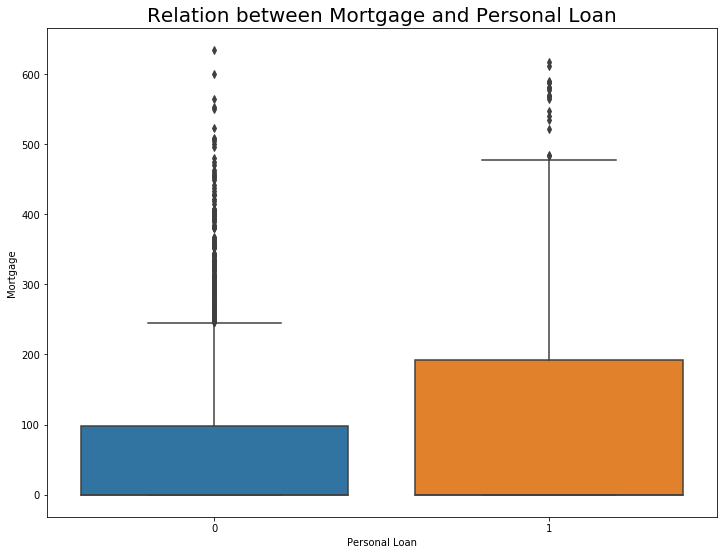

In [17]:
# finding the relationship between Mortgage and Personal Loan using Boxplot 
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df['Personal Loan'], df['Mortgage'])
plt.title('Relation between Mortgage and Personal Loan', fontsize = 20, fontweight = 30)
plt.show()

Looks like Mortgage is not related to Personal Loan

## Prepare Data

In [18]:
# converting all categorical fields to object type to get dummies
df['Family'] = df['Family'].astype('object')
df['Education'] = df['Education'].astype('object')
df['Securities Account'] = df['Securities Account'].astype('object')
df['CD Account'] = df['CD Account'].astype('object')
df['Online'] = df['Online'].astype('object')
df['CreditCard'] = df['CreditCard'].astype('object')

In [19]:
# drop age (Because the correlation with experience is high)
df = df.drop(["Age"], axis=1)

In [20]:
# taking the labels out from the data

y = df['Personal Loan']
df = df.drop('Personal Loan', axis = 1)

In [21]:
# one hot encoding
df = pd.get_dummies(df, drop_first=True)

In [22]:
# check data
df.head()

,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,1,49,1.6,0,0,0,1,0,0,1,0,0,0
1,19,34,1.5,0,0,1,0,0,0,1,0,0,0
2,15,11,1.0,0,0,0,0,0,0,0,0,0,0
3,9,100,2.7,0,0,0,0,1,0,0,0,0,0
4,8,45,1.0,0,0,0,1,1,0,0,0,0,1


### Train-test split

In [23]:
# splitting train and test data in 70:30 ratio
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Scaling Numeric Features

In [24]:
# Scale the numeric attributes
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,:4])

# transforming 
X_train.iloc[:,:4] = scaler.transform(X_train.iloc[:,:4])
X_test.iloc[:,:4] = scaler.transform(X_test.iloc[:,:4])

## Logistic Regression

In [25]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# training model
predicted_classes = lr_model.predict(X_train)

accuracy = accuracy_score(y_train, predicted_classes)

parameters = lr_model.coef_

# testing model
predicted_classes_test = lr_model.predict(X_test)

accuracy_test = accuracy_score(y_test, predicted_classes_test)

In [26]:
print('Training accuracy is', accuracy)
print('Test accuracy is ', accuracy_test)
print('Parameters :', parameters)
print(lr_model)
LR_cm = confusion_matrix(y_test, predicted_classes_test)
print(LR_cm)

Training accuracy is 0.9605714285714285
Test accuracy is  0.9526666666666667
Parameters : [[ 0.04957756  2.3591141   0.35922247  0.08249604 -0.27490017  1.78546415
   1.13732627  2.91039786  3.11232527 -0.79517373  2.94745676 -0.57213193
  -0.84863244]]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
[[1341   10]
 [  61   88]]


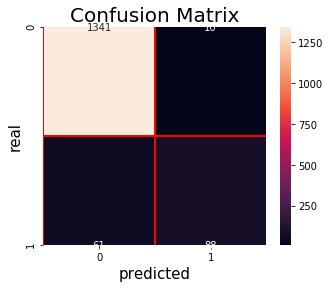

In [27]:
f, ax = plt.subplots(figsize = (5,4))
sns.heatmap(LR_cm,annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel('predicted', fontsize = 15)
plt.ylabel('real', fontsize = 15)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

## KNN Classifier

In [28]:
# prepare a range of alpha values to test
neighbors = np.arange(1,50)
# create and fit a ridge regression model, testing each alpha
knn_model = KNeighborsClassifier()
grid = GridSearchCV(cv=20,estimator=knn_model, param_grid=dict(n_neighbors=neighbors))
grid.fit(X_train, y_train)
print(grid)

GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [29]:
# summarize the results of the grid search
print('Best K score is', grid.best_score_)
print('Best K value is', grid.best_estimator_.n_neighbors)

Best K score is 0.958
Best K value is 1


In [30]:
# using the best K value in model
knn=KNeighborsClassifier(n_neighbors=1)
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)

scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,y_train)
print('Testing Accuracy is', knn.score(scaledX_test,y_test))

print('Training Accuracy is', knn.score(scaledX_train,y_train))

predicted = knn.predict(scaledX_test)
KNN_cm = confusion_matrix(y_test,predicted)
print(KNN_cm)

Testing Accuracy is 0.9533333333333334
Training Accuracy is 1.0
[[1335   16]
 [  54   95]]


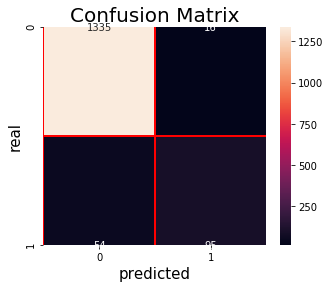

In [31]:
f, ax = plt.subplots(figsize = (5,4))
sns.heatmap(KNN_cm,annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel('predicted', fontsize = 15)
plt.ylabel('real', fontsize = 15)
plt.title('Confusion Matrix', fontsize = 20, fontweight = 30)
plt.show()

## Naive Bayes

In [32]:
NB = GaussianNB()

NB.fit(X_train, y_train)

train_predict = NB.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predict)

test_predict = NB.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predict)

In [33]:
print('Training accuracy is', train_accuracy)
print('Test accuracy is', test_accuracy)
NB_cm = confusion_matrix(y_test, test_predict)
print(NB_cm)

Training accuracy is 0.8911428571428571
Test accuracy is 0.876
[[1229  122]
 [  64   85]]


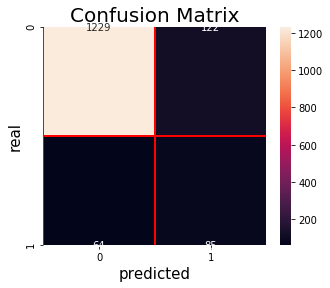

In [34]:
f, ax = plt.subplots(figsize = (5,4))
sns.heatmap(NB_cm,annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax)
plt.xlabel('predicted', fontsize = 15)
plt.ylabel('real', fontsize = 15)
plt.title('Confusion Matrix', fontsize = 20, fontweight = 30)
plt.show()

### Confusion matrix of all models

Lets print and compare the confusion matrix of all three models

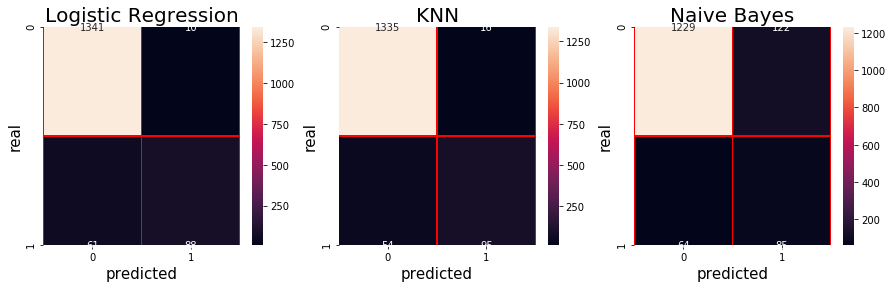

In [35]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,4))

g1 = sns.heatmap(LR_cm,annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax1)
g1.set_ylabel('real', fontsize = 15)
g1.set_xlabel('predicted', fontsize = 15)
g1.set_title('Logistic Regression', fontsize = 20, fontweight = 30)

g2 = sns.heatmap(KNN_cm,annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax2)
g2.set_ylabel('real', fontsize = 15)
g2.set_xlabel('predicted', fontsize = 15)
g2.set_title('KNN', fontsize = 20, fontweight = 30)

g3 = sns.heatmap(NB_cm,annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f",ax = ax3)
g3.set_ylabel('real', fontsize = 15)
g3.set_xlabel('predicted', fontsize = 15)
g3.set_title('Naive Bayes', fontsize = 20, fontweight = 30)

plt.show()

### Which one is the best model?

All three models, Logistic Regression, KNN and Naive Bayes are predicted more than 87%, let see in details of each model's test and training scores

|          |     LR     |    KNN     |     NB     |
|----------|------------|------------|------------|
| Training | 0.96057142 | 1.0        | 0.89114285 |
| Testing  | 0.95266667 | 0.95333334 | 0.876      |

<b>KNN</b> model shows that its <b>overfitting</b>, since training score is <b>100%</b>, and also K value is <b>1</b>, which shows clearly its <b>overfitting model</b>

<b>Naive Bayes</b> model has training score as <b>89%</b> and testing score as <b>87%</b> which is pretty good model, but

<b>Logistic Regression</b> model has training score as <b>96%</b> and testing score as <b>95%</b>, which is really good model when compare to other models here, hence we can conclude that <b>Logistic Regression</b> is <b>the best model</b> for this dataset.

#### Logistic Regression is the best model for this dataset

#### Why Logistic Regression is perform better?

<b>Advantages :</b>
<li>Easy, fast and simple classification method.
<li>θ parameters explains the direction and intensity of significance of independent variables over the dependent variable.
<li>Can be used for multiclass classifications also.
<li>Loss function is always convex.

<b>Logistic Regression vs Naive Bayes :</b>
<li>Naive bayes is a generative model whereas LR is a discriminative model.
<li>Naive bayes works well with small datasets, whereas LR+regularization can achieve similar performance.
<li>LR performs better than naive bayes upon colinearity, as naive bayes expects all features to be independent.